In [1]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot as plt
from collections import defaultdict
import csv
import numpy as np

In [2]:
import pandas as pd 
data = pd.read_csv("dataset.csv", sep=";", dtype={'Physikalischer Nettoexport[MWh]': str})
#data.all()
data.head()

,Datum,Uhrzeit,Physikalischer Nettoexport[MWh],Niederlande (Export)[MWh],Niederlande (Import)[MWh],Schweiz (Export)[MWh],Schweiz (Import)[MWh],Dänemark (Export)[MWh],Dänemark (Import)[MWh],Tschechien (Export)[MWh],...,Luxemburg (Export)[MWh],Luxemburg (Import)[MWh],Schweden (Export)[MWh],Schweden (Import)[MWh],Österreich (Export)[MWh],Österreich (Import)[MWh],Frankreich (Export)[MWh],Frankreich (Import)[MWh],Polen (Export)[MWh],Polen (Import)[MWh]
0,01.06.2019,00:00,-5.126,119.000,-19.0,0.0,-1.11,0.0,-1.508,0.0,...,446,0,0,-446,139.0,-749.0,0.0,-1.821,817.0,0
1,01.06.2019,01:00,-4.385,514.000,-102.0,0.0,-756.00,0.0,-1.211,0.0,...,424,0,0,-446,180.0,-750.0,0.0,-1.631,569.0,0
2,01.06.2019,02:00,-3.531,823.000,-15.0,0.0,-506.00,14.0,-944.000,0.0,...,415,0,0,-446,410.0,-632.0,0.0,-1.999,532.0,0
3,01.06.2019,03:00,-3.054,1.325,-0.0,0.0,-488.00,60.0,-688.000,0.0,...,409,0,0,-446,468.0,-656.0,0.0,-2.276,505.0,0
4,01.06.2019,04:00,-3.972,1.340,-0.0,13.0,-370.00,39.0,-823.000,0.0,...,408,0,0,-446,492.0,-859.0,0.0,-2.432,254.0,-13


In [3]:
data[['Physikalischer Nettoexport[MWh]']]

,Physikalischer Nettoexport[MWh]
0,-5.126
1,-4.385
2,-3.531
3,-3.054
4,-3.972
5,-3.618
6,-2.375
7,-1.102
8,757
9,3.584


In [4]:
#Dieser Regex löscht den Punkt heraus, damit aus 5,126 (kleiner als 10) 5126 wird.
realdata = data[['Physikalischer Nettoexport[MWh]']].replace({"\\.": ""}, regex=True).astype(int)
realdata

,Physikalischer Nettoexport[MWh]
0,-5126
1,-4385
2,-3531
3,-3054
4,-3972
5,-3618
6,-2375
7,-1102
8,757
9,3584


In [5]:
#Korrekter Wert, mit Excel-Sum kontrolliert
realdata.sum()

Physikalischer Nettoexport[MWh]   -336024
dtype: int64

In [6]:
#Dieser Wert stimmt auch und ist für den 1. Tag 
realdata.loc[0, 'Physikalischer Nettoexport[MWh]'] + realdata.loc[1, 'Physikalischer Nettoexport[MWh]'] + realdata.loc[2, 'Physikalischer Nettoexport[MWh]'] + realdata.loc[3, 'Physikalischer Nettoexport[MWh]'] + realdata.loc[4, 'Physikalischer Nettoexport[MWh]'] + realdata.loc[5, 'Physikalischer Nettoexport[MWh]'] + realdata.loc[6, 'Physikalischer Nettoexport[MWh]'] + realdata.loc[7, 'Physikalischer Nettoexport[MWh]'] + realdata.loc[8, 'Physikalischer Nettoexport[MWh]'] + realdata.loc[9, 'Physikalischer Nettoexport[MWh]'] + realdata.loc[10, 'Physikalischer Nettoexport[MWh]'] + realdata.loc[11, 'Physikalischer Nettoexport[MWh]'] + realdata.loc[12, 'Physikalischer Nettoexport[MWh]'] + realdata.loc[13, 'Physikalischer Nettoexport[MWh]'] + realdata.loc[14, 'Physikalischer Nettoexport[MWh]'] + realdata.loc[15, 'Physikalischer Nettoexport[MWh]'] + realdata.loc[16, 'Physikalischer Nettoexport[MWh]'] + realdata.loc[17, 'Physikalischer Nettoexport[MWh]'] + realdata.loc[18, 'Physikalischer Nettoexport[MWh]'] + realdata.loc[19, 'Physikalischer Nettoexport[MWh]'] + realdata.loc[20, 'Physikalischer Nettoexport[MWh]'] + realdata.loc[21, 'Physikalischer Nettoexport[MWh]'] + realdata.loc[22, 'Physikalischer Nettoexport[MWh]'] + realdata.loc[23, 'Physikalischer Nettoexport[MWh]']

-24640

In [7]:
hours = 0
day = 1
dayssum = []
while (day < 14):
    value = 0
    while (hours < day * 24):
        value = value + realdata.loc[hours, 'Physikalischer Nettoexport[MWh]'] 
        hours = hours + 1
    dayssum.append(value)
    day = day + 1
print(dayssum)

[-24640, 25536, -46931, -59950, -55714, -74399, -37066, 161985, 11268, -9732, -103835, -78896, -18703]


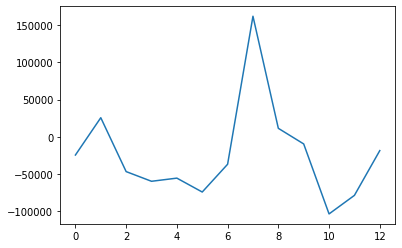

In [8]:
plt.plot(dayssum)